# DBSCAN on morophological features

In this notebook, we tested DBSCAN on morphological features of PDAC dataset in order to identify clusters.

# 0. Import packages and data

pip install kneed

pip install opencv-python

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# for DBSCAN clustering
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from collections import Counter

Import morphological features : 

In [2]:
PDAC_A1 = pd.read_csv("morphoplogical_features/PDAC_A1_df")
PDAC_B2 = pd.read_csv("morphoplogical_features/PDAC_B2_df")
PanCN_C3 = pd.read_csv("morphoplogical_features/PanCN_C3_df")
PanCN_D4 = pd.read_csv("morphoplogical_features/PanCN_D4_df")

Import images :

In [3]:
input_images = "./../input_images"

In [4]:
img_A1 = cv2.imread(f'{input_images}/PDAC_12747476B_A1.jpg')
img_B2 = cv2.imread(f'{input_images}/PDAC_ILS50185PT2_B2.jpg')
img_C3 = cv2.imread(f'{input_images}/PanCN_AVD_79MZ_0594_C3.jpg')
img_D4 = cv2.imread(f'{input_images}/PanCN_AVD_61VQ_0158_D4.jpg')

# 1. A1

## Preprocess df

In [ ]:
PDAC_A1_original = PDAC_A1

In [ ]:
PDAC_A1 = PDAC_A1.drop(columns= ["Unnamed: 0", "Name", "Total Nuclei (#)", "Center X", "Center Y", "new_x", "new_y"])
PDAC_A1.head()

## Determined optimal parameters

In [ ]:
nbrs = NearestNeighbors(n_neighbors = 5).fit(PDAC_A1)

In [ ]:
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(PDAC_A1)

In [ ]:
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

In [ ]:
k_dist = sort_neigh_dist[:, 4]

In [ ]:
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [ ]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

In [ ]:
kneedle.plot_knee()
plt.show()

## Perform DBSCAN clustering

In [ ]:
clusters = DBSCAN(eps = kneedle.knee_y, min_samples = 4).fit(PDAC_A1)

In [ ]:
clusters.labels_

In [ ]:
# check unique clusters
set(clusters.labels_)

In [ ]:
Counter(clusters.labels_)

## Visualization

In [ ]:
plt.imshow(img_A1)
plt.scatter(PDAC_A1_original["new_x"],PDAC_A1_original["new_y"], s = 1, c=clusters.labels_.astype(float))
plt.show()

# 2. B2

## Preprocess df

In [5]:
PDAC_B2_original = PDAC_B2

In [6]:
PDAC_B2 = PDAC_B2.drop(columns= ["Unnamed: 0", "Name", "Total Nuclei (#)", "Center X", "Center Y", "new_x", "new_y"])
PDAC_B2.head()

,Nuclei Area per object,Texture inertia,Max Intensity,Mean Intensity,Min Intensity,Modus,Texture Anisotropy,Texture Entropy,Texture Major Axis,Texture Major Direction,Texture Minor Axis
0,22.50,13221.945991,148.265762,123.238940,97.844582,111.745285,1.554312e-15,2.201911,0.847026,0.000000,0.847026
1,56.25,13221.945991,229.297897,180.612488,138.413345,158.885101,1.733108e-01,2.203774,1.682064,29.911218,1.390544
2,18.50,13221.945991,219.379120,164.964777,98.549644,117.509422,1.757970e-01,9.646840,1512.508475,110.905018,1246.614048
3,13.25,13221.945991,209.646164,152.203821,107.101357,145.107941,7.963259e-01,10.012107,5461.165999,1.543453,1112.298000
4,18.50,13221.945991,246.869537,169.691705,99.229431,134.526611,2.588855e-01,9.693675,1467.966275,152.599960,1087.931141


## Determined optimal parameters

In [7]:
nbrs = NearestNeighbors(n_neighbors = 5).fit(PDAC_B2)

In [8]:
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(PDAC_B2)

In [9]:
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

In [10]:
k_dist = sort_neigh_dist[:, 4]

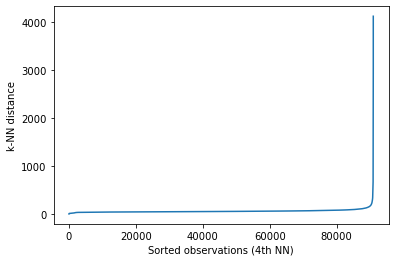

In [11]:
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [12]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

852.4912265691897


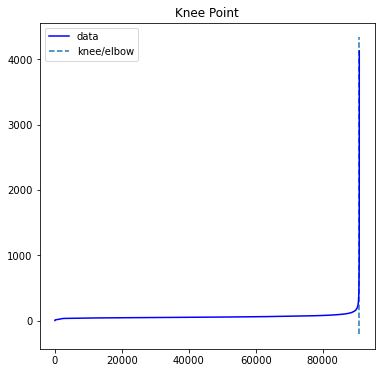

In [13]:
kneedle.plot_knee()
plt.show()

## Perform DBSCAN clustering

In [14]:
clusters = DBSCAN(eps = kneedle.knee_y, min_samples = 4).fit(PDAC_B2)

In [15]:
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# check unique clusters
set(clusters.labels_)

{-1, 0}

In [17]:
Counter(clusters.labels_)

Counter({0: 90934, -1: 19})

## Visualization

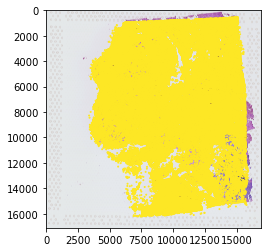

In [20]:
plt.imshow(img_B2)
plt.scatter(PDAC_B2_original["new_x"],PDAC_B2_original["new_y"], s = 1, c=clusters.labels_.astype(float))
plt.show()

# 3. C3.

## Preprocess df

In [21]:
PanCN_C3_original = PanCN_C3

In [22]:
PanCN_C3 = PanCN_C3.drop(columns= ["Unnamed: 0", "Name", "Total Nuclei (#)", "Center X", "Center Y", "new_x", "new_y"])
PanCN_C3.head()

,Nuclei Area per object,Texture inertia,Max Intensity,Mean Intensity,Min Intensity,Modus,Texture Anisotropy,Texture Entropy,Texture Major Axis,Texture Major Direction,Texture Minor Axis
0,37.00,4624.952512,104.315163,70.199417,49.392860,60.350582,0.261332,8.969983,1097.227225,32.302473,810.486585
1,52.50,4624.952512,105.821548,60.258968,33.355782,41.344807,0.394836,8.944638,1774.762880,75.181738,1074.023232
2,33.50,4624.952512,132.559052,104.915861,64.481720,132.559052,0.075851,9.050427,824.995626,30.106611,762.419292
3,34.75,4624.952512,114.042694,65.169379,41.246712,74.150513,0.508010,9.324317,1972.432776,169.161279,970.418105
4,50.00,4624.952512,111.790764,80.436637,46.212833,59.376213,0.281402,8.800007,700.064283,128.933254,503.064811


## Determined optimal parameters

In [23]:
nbrs = NearestNeighbors(n_neighbors = 5).fit(PanCN_C3)

In [24]:
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(PanCN_C3)

In [25]:
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

In [26]:
k_dist = sort_neigh_dist[:, 4]

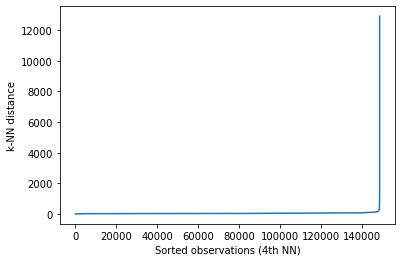

In [27]:
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [28]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

864.2088588342705


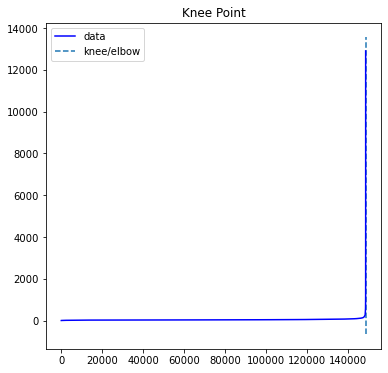

In [29]:
kneedle.plot_knee()
plt.show()

## Perform DBSCAN clustering

In [ ]:
clusters = DBSCAN(eps = kneedle.knee_y, min_samples = 4).fit(PanCN_C3)

In [ ]:
clusters.labels_

In [ ]:
# check unique clusters
set(clusters.labels_)

In [ ]:
Counter(clusters.labels_)

## Visualization

In [ ]:
plt.imshow(img_C3)
plt.scatter(PanCN_C3_original["new_x"],PanCN_C3_original["new_y"], s = 1, c=clusters.labels_.astype(float))
plt.show()

# 4. D4. 

## Preprocess df

In [ ]:
PanCN_D4_original = PanCN_D4

In [ ]:
PanCN_D4 = PanCN_D4.drop(columns= ["Unnamed: 0", "Name", "Total Nuclei (#)", "Center X", "Center Y", "new_x", "new_y"])
PanCN_D4.head()

## Determined optimal parameters

In [ ]:
nbrs = NearestNeighbors(n_neighbors = 5).fit(PanCN_D4)

In [ ]:
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(PanCN_D4)

In [ ]:
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

In [ ]:
k_dist = sort_neigh_dist[:, 4]

In [ ]:
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [ ]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

In [ ]:
kneedle.plot_knee()
plt.show()

## Perform DBSCAN clustering

In [ ]:
clusters = DBSCAN(eps = kneedle.knee_y, min_samples = 4).fit(PanCN_D4)

In [ ]:
clusters.labels_

In [ ]:
# check unique clusters
set(clusters.labels_)

In [ ]:
Counter(clusters.labels_)

## Visualization

In [ ]:
plt.imshow(img_D4)
plt.scatter(PanCN_D4_original["new_x"],PanCN_D4_original["new_y"], s = 1, c=clusters.labels_.astype(float))
plt.show()